In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ls.config.loader import load_config

In [3]:
cfg = load_config("../configs/config.yaml")

In [4]:
cfg.keys()

dict_keys(['seed', 'dataset', 'audio', 'models', 'training', 'mlflow'])

In [5]:
print("Seed:", cfg.seed)
print("Dataset config:", cfg.dataset)
print("Audio config:", cfg.audio)
print("Models config:", cfg.models)
print("Training config:", cfg.training)
print("MLflow config:", cfg.mlflow)

Seed: 42
Dataset config: {'name': 'icbhi', 'data_folder': '/Users/gkont/Downloads/Datasets/icbhi_dataset', 'class_split': 'lungsound', 'split_strategy': 'official', 'test_fold': 0, 'n_cls': 4, 'weighted_sampler': True, 'batch_size': 32, 'num_workers': 0, 'h': 128, 'w': 256}
Audio config: {'sample_rate': 16000, 'desired_length': 10.0, 'pad_type': 'repeat', 'use_fade': True, 'fade_samples_ratio': 64, 'n_mels': 128, 'frame_length': 40, 'frame_shift': 10, 'low_freq': 0, 'high_freq': 8000, 'window_type': 'hanning', 'use_energy': False, 'dither': 0.0, 'mel_norm': 'hf', 'resz': 1.0, 'raw_augment': 0, 'wave_aug': [{'type': 'Crop', 'sampling_rate': 16000, 'zone': [0.0, 1.0], 'coverage': 1.0, 'p': 0.0}, {'type': 'Noise', 'color': 'white', 'p': 0.0}, {'type': 'Speed', 'factor': [0.9, 1.1], 'p': 0.0}, {'type': 'Loudness', 'factor': [0.5, 2.0], 'p': 0.1}, {'type': 'VTLP', 'sampling_rate': 16000, 'zone': [0.0, 1.0], 'fhi': 4800, 'factor': [0.9, 1.1], 'p': 0.1}, {'type': 'Pitch', 'sampling_rate': 160

In [6]:
from ls.data.icbhi_utils import (
    get_annotations,
    get_individual_cycles
)

In [7]:
# --- 2. Load annotations ---
annotations = get_annotations(cfg.dataset.data_folder, cfg.dataset.class_split)
print(f"Found {len(annotations)} files with annotations.")

# Show one example file
first_key = next(iter(annotations.keys()))
print("Example recording:", first_key)
print(annotations[first_key].head())

Found 920 files with annotations.
Example recording: 148_1b1_Al_sc_Meditron
   Start    End  Crackles  Wheezes
0  0.022  0.364         0        0
1  0.364  2.436         0        0
2  2.436  4.636         0        0
3  4.636  6.793         0        0
4  6.793  8.750         0        0


In [8]:
# --- 3. Extract cycles for first file ---
cycles = get_individual_cycles(
    annotations[first_key],
    cfg.dataset,
    cfg.audio,
    filename=first_key,
)

print(f"Extracted {len(cycles)} cycles from {first_key}")
cycle_id = 3
waveform, label = cycles[cycle_id]
print("Waveform shape:", waveform.shape, " Label:", label)

Extracted 11 cycles from 148_1b1_Al_sc_Meditron
Waveform shape: torch.Size([1, 34512])  Label: 0


/opt/homebrew/Caskroom/miniconda/base/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(


In [9]:
from ls.data.transforms import generate_fbank

In [10]:
# --- 4. Generate mel fbank features ---
fbank = generate_fbank(waveform, cfg.audio)
print("Fbank shape:", fbank.shape)

Fbank shape: torch.Size([212, 128, 1])


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

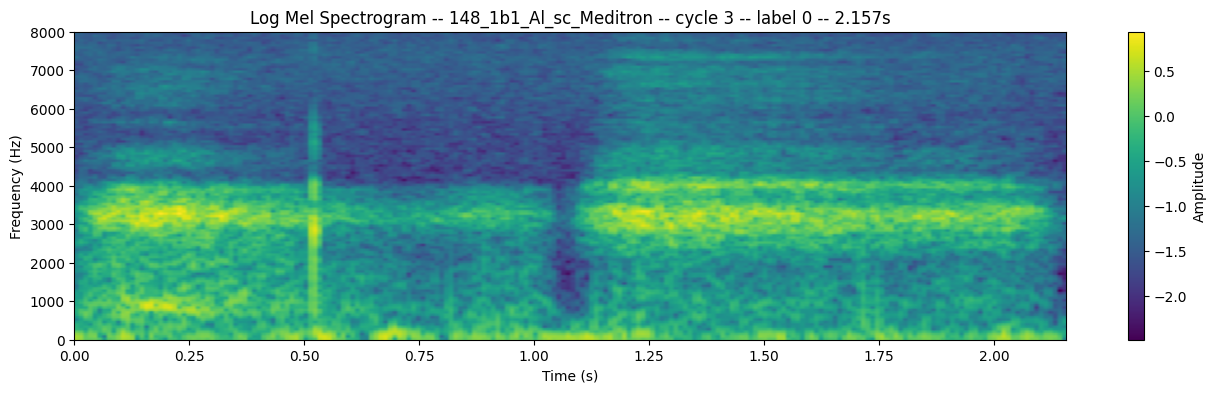

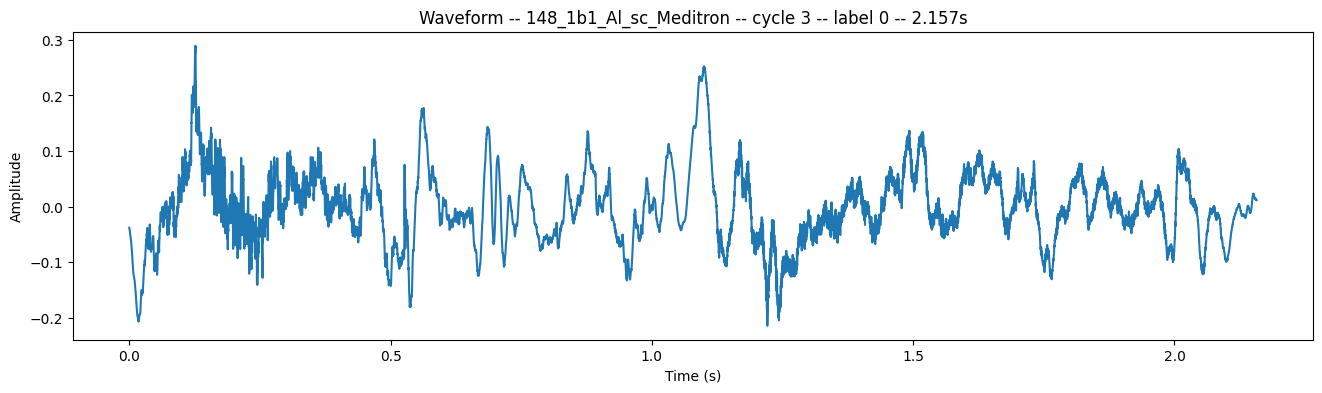

In [12]:
cycle_len = waveform.shape[1] / cfg.audio.sample_rate
x_axis = np.linspace(0, cycle_len, fbank.shape[0])
freq_axis = np.linspace(cfg.audio.low_freq, cfg.audio.high_freq, fbank.shape[1])
# orig_dur = annotations[first_key].iloc[cycle_id, 1] - annotations[first_key].iloc[cycle_id, 0]

plt.figure(figsize=(16, 4))
plt.imshow(fbank.squeeze(-1).T, aspect="auto", extent=[0, x_axis[-1], 0, freq_axis[-1]], origin="lower")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Amplitude")
plt.title(f"Log Mel Spectrogram -- {first_key} -- cycle {3} -- label {label} -- {cycle_len}s")
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(np.linspace(0, cycle_len, waveform.shape[1]), waveform.squeeze(0).numpy())
plt.title(f"Waveform -- {first_key} -- cycle {3} -- label {label} -- {cycle_len}s")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

ipd.Audio(waveform.numpy(), rate=cfg.audio.sample_rate)

## Advanced config managment

In [31]:
from ls.config.loader import load_config

In [34]:
# cfg = load_config("../configs/base.yaml")